### Environment Setup

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

### Parameters Setup

In [4]:
# Date range
start = '2013-01-01'
end = '2024-09-30'

benchmark_symbol = 'SPY'

# Tickers of assets
stocks_1 = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
industry_1 =  ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']
stocks_2 = [
            'AMAT', 'AMD','AVGO',  
            'BAC','BKR','BMY','BSX',
            'C','CMCSA',
            'CSCO','CSX','CVS','CVX',
            'DIS','DVN',
            'FCX','FNF','GEN','GILD',
            'GM','HAL','HPQ','INTC',
            'IPG','JNJ','KDP',
            'KKR','KMI','KO',
            'MDLZ','MO','MRK','MRO',
            'MRVL','MSFT','MU','NEM',
]

industry_2 = [
        'Technology','Technology','Technology',
        'Financial Services','Energy','Healthcare','Healthcare',
        'Financial Services','Communication Services',
        'Technology','Industrials','Healthcare','Energy',
        'Communication Services','Energy',
        'Basic Materials','Financial Services','Technology','Healthcare',
        'Consumer Cyclical','Energy','Technology','Technology',
        'Communication Services','Healthcare','Consumer Defensive',
        'Financial Services','Energy','Consumer Defensive',
        'Consumer Defensive','Consumer Defensive','Healthcare','Energy',
        'Technology','Technology','Technology','Basic Materials',
]

ETF_BOND = ['HYG','LQD','TLT',
           ]
industry_BOND = ['Bond','Bond','Bond',
                ]

ETF_COMM = [
    'DBA','GLD','SLV','XLE','XME','XOP',
]

industry_COMM=[
    'Commodity','Commodity','Commodity','Commodity','Commodity','Commodity',
]

ETF_list = ['HYG','LQD','TLT',
           'DBA',
           'GLD','SLV','XLE','XME','XOP','XBI','EFA',
            'EWW','EWZ','VNQ','XHB',
            'IWM','QQQ']
industry_etf =  ['Bond','Bond','Bond',
               'Commodity',
               'Commodity','Commodity','Commodity','Commodity','Commodity',
               'Healthcare',
               'International','International','International',
               'Real Estate','Real Estate',
               'US Major','US Major',
               ]

assets = stocks_1 + [benchmark_symbol]

asset_classes_dict = {'Assets': stocks_1, 
                 'Industry': industry_1}

assets.sort()

### Download Data
Full data download from yfinance to **prices** dataframe

In [5]:
# Downloading data
prices = yf.download(assets, start=start, end=end)
prices = prices.dropna()

[*********************100%***********************]  26 of 26 completed


In [6]:
display(prices)

Price                      Adj Close                                    \
Ticker                           APA          BA        BAX        BMY   
Date                                                                     
2013-01-02 00:00:00+00:00  64.472412   64.583855  29.615259  22.751949   
2013-01-03 00:00:00+00:00  65.334801   64.919067  29.672157  23.120605   
2013-01-04 00:00:00+00:00  66.436775   65.103416  29.956726  23.197117   
2013-01-07 00:00:00+00:00  64.160980   63.796135  29.987354  23.231897   
2013-01-08 00:00:00+00:00  63.809654   62.120152  29.956726  23.294497   
...                              ...         ...        ...        ...   
2024-09-23 00:00:00+00:00  25.440001  156.300003  39.000000  49.456383   
2024-09-24 00:00:00+00:00  25.340000  155.809998  38.980000  50.376087   
2024-09-25 00:00:00+00:00  24.570000  152.220001  38.340000  49.397049   
2024-09-26 00:00:00+00:00  23.150000  154.580002  38.709999  49.565163   
2024-09-27 00:00:00+00:00  24.530001  156.320007  38.910000  50.346420   

Price                                                                   \
Ticker                         CMCSA        CNP        CPB          DE   
Date                                                                     
2013-01-02 00:00:00+00:00  15.049656  12.814725  25.502375   70.048889   
2013-01-03 00:00:00+00:00  14.881649  12.853906  25.552073   69.873741   
2013-01-04 00:00:00+00:00  14.873837  12.945347  25.331984   70.590248   
2013-01-07 00:00:00+00:00  14.807420  12.801654  25.204180   70.534515   
2013-01-08 00:00:00+00:00  14.909000  12.716745  24.842093   69.802109   
...                              ...        ...        ...         ...   
2024-09-23 00:00:00+00:00  40.427212  28.930000  50.059978  407.511841   
2024-09-24 00:00:00+00:00  41.042599  28.680000  49.266163  409.445038   
2024-09-25 00:00:00+00:00  40.288250  28.620001  49.107399  405.498932   
2024-09-26 00:00:00+00:00  40.715054  28.940001  49.037937  410.022980   
2024-09-27 00:00:00+00:00  41.330444  29.100000  48.978405  416.529999   

Price                                            ...   Volume          \
Ticker                           HPQ        JCI  ...     PCAR     PSA   
Date                                             ...                    
2013-01-02 00:00:00+00:00   4.818667  21.693371  ...  4159350  636300   
2013-01-03 00:00:00+00:00   4.857164  21.161150  ...  3604800  568600   
2013-01-04 00:00:00+00:00   4.857164  21.132765  ...  2782350  444100   
2013-01-07 00:00:00+00:00   4.866789  21.161150  ...  1938900  442300   
2013-01-08 00:00:00+00:00   4.937369  21.125671  ...  2397600  446000   
...                              ...        ...  ...      ...     ...   
2024-09-23 00:00:00+00:00  35.110001  74.901367  ...  1832200  595100   
2024-09-24 00:00:00+00:00  35.840000  75.180000  ...  1592700  479400   
2024-09-25 00:00:00+00:00  36.049999  75.830002  ...  3085600  652000   
2024-09-26 00:00:00+00:00  36.849998  76.540001  ...  3107100  724900   
2024-09-27 00:00:00+00:00  35.410000  77.209999  ...  2107700  790700   

Price                                                                       \
Ticker                         SEE        SPY         T       TGT      TMO   
Date                                                                         
2013-01-02 00:00:00+00:00  2142800  192059000  50740314   9523000  1737600   
2013-01-03 00:00:00+00:00  2034400  144761800  38306895  10665800  1321800   
2013-01-04 00:00:00+00:00  1398000  116817700  27984858   5249300  1656000   
2013-01-07 00:00:00+00:00  1679000  110002500  36410662   4896500  1839200   
2013-01-08 00:00:00+00:00  2511700  121265100  38674437   4928700  1766900   
...                            ...        ...       ...       ...      ...   
2024-09-23 00:00:00+00:00  1561800   44116900  25550300   2927700   883200   
2024-09-24 00:00:00+00:00  2374400   46805700  25905500   3114000  1361100   
2024-09-25 00:00:00+00:00  1138000   38428600

In [7]:
############################################################
# Calculate assets returns
############################################################

# pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=[benchmark_symbol]).dropna()
returns = data.pct_change().dropna()
display(returns.index[0], returns.index[-1])

Timestamp('2013-01-03 00:00:00+0000', tz='UTC')

Timestamp('2024-09-27 00:00:00+0000', tz='UTC')

In [8]:
#  all test is from the 1004th day and finish at the last testdata day.
#
start_test = 1004
end_test = prices.shape[0] - 1
test_size = 1000
print(f" Testing data from {start_test} to {end_test}")

 Testing data from 1004 to 2954


### Building the Backtest Function with Backtrader

In [9]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # print(datas)
    print(f"start={start} - end={end}")
    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.Days)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        print(f"backtest.plot: {start}-{end}")
        cerebro.plot(iplot=False, start=start, end=end)
    return results[0]


### Building Data Feeds for Backtesting
**asset_prices** = list of all asset except 'SPY' in the bt.feeds of *OHLC + Volume*    
**benchmark**  = 'SPY' *OHLC+Volume* in bt.feeds

In [10]:
############################################################
# Create objects that contain the prices of assets
############################################################
# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != benchmark_symbol:
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        print(f"{i}: \n", prices_)
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))
        
print(assets_prices)

# Creating Benchmark bt.feeds        
prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), benchmark_symbol)].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
display(benchmark_symbol)
display(prices_)
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

APA: 
                                Close       High        Low       Open   Volume
Date                                                                          
2013-01-02 00:00:00+00:00  80.739998  80.750000  79.529999  80.000000  3468800
2013-01-03 00:00:00+00:00  81.820000  82.440002  80.040001  80.599998  3095200
2013-01-04 00:00:00+00:00  83.199997  83.720001  81.910004  82.199997  3094800
2013-01-07 00:00:00+00:00  80.349998  81.989998  80.120003  81.800003  4713400
2013-01-08 00:00:00+00:00  79.910004  80.250000  79.400002  80.169998  2721300
...                              ...        ...        ...        ...      ...
2024-09-23 00:00:00+00:00  25.440001  25.860001  25.049999  25.209999  4227300
2024-09-24 00:00:00+00:00  25.340000  26.010000  25.320000  25.950001  3469200
2024-09-25 00:00:00+00:00  24.570000  25.360001  24.530001  25.270000  4781400
2024-09-26 00:00:00+00:00  23.150000  24.270000  23.030001  24.040001  8566800
2024-09-27 00:00:00+00:00  24.530001  24.5900

'SPY'

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02 00:00:00+00:00,146.059998,146.149994,144.729996,145.110001,192059000
2013-01-03 00:00:00+00:00,145.729996,146.369995,145.339996,145.990005,144761800
2013-01-04 00:00:00+00:00,146.369995,146.610001,145.669998,145.970001,116817700
2013-01-07 00:00:00+00:00,145.970001,146.110001,145.429993,145.850006,110002500
2013-01-08 00:00:00+00:00,145.550003,145.910004,144.979996,145.710007,121265100
...,...,...,...,...,...
2024-09-23 00:00:00+00:00,569.669983,570.330017,568.099976,569.340027,44116900
2024-09-24 00:00:00+00:00,571.299988,571.359985,567.599976,570.479980,46805700
2024-09-25 00:00:00+00:00,570.039978,571.890015,568.909973,571.140015,38428600


,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02 00:00:00+00:00,146.059998,146.149994,144.729996,145.110001,192059000
2013-01-03 00:00:00+00:00,145.729996,146.369995,145.339996,145.990005,144761800
2013-01-04 00:00:00+00:00,146.369995,146.610001,145.669998,145.970001,116817700
2013-01-07 00:00:00+00:00,145.970001,146.110001,145.429993,145.850006,110002500
2013-01-08 00:00:00+00:00,145.550003,145.910004,144.979996,145.710007,121265100


In [11]:
(slice(None), benchmark_symbol)

(slice(None, None, None), 'SPY')

In [12]:
tt = prices.drop(columns='Adj Close').loc[:, (slice(None), benchmark_symbol)].dropna()
display(tt.columns)
display(prices_)

MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])

,Close,High,Low,Open,Volume
Date,,,,,
2013-01-02 00:00:00+00:00,146.059998,146.149994,144.729996,145.110001,192059000
2013-01-03 00:00:00+00:00,145.729996,146.369995,145.339996,145.990005,144761800
2013-01-04 00:00:00+00:00,146.369995,146.610001,145.669998,145.970001,116817700
2013-01-07 00:00:00+00:00,145.970001,146.110001,145.429993,145.850006,110002500
2013-01-08 00:00:00+00:00,145.550003,145.910004,144.979996,145.710007,121265100
...,...,...,...,...,...
2024-09-23 00:00:00+00:00,569.669983,570.330017,568.099976,569.340027,44116900
2024-09-24 00:00:00+00:00,571.299988,571.359985,567.599976,570.479980,46805700
2024-09-25 00:00:00+00:00,570.039978,571.890015,568.909973,571.140015,38428600


### Buy and Hold for the BenchMark 

In [13]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= start_test:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

In [14]:
print(start_test, end_test,benchmark )

1004 2954 <backtrader.feeds.pandafeed.PandasData object at 0x7f5fade56450>


start=1004 - end=2954
backtest.plot: 1004-2954


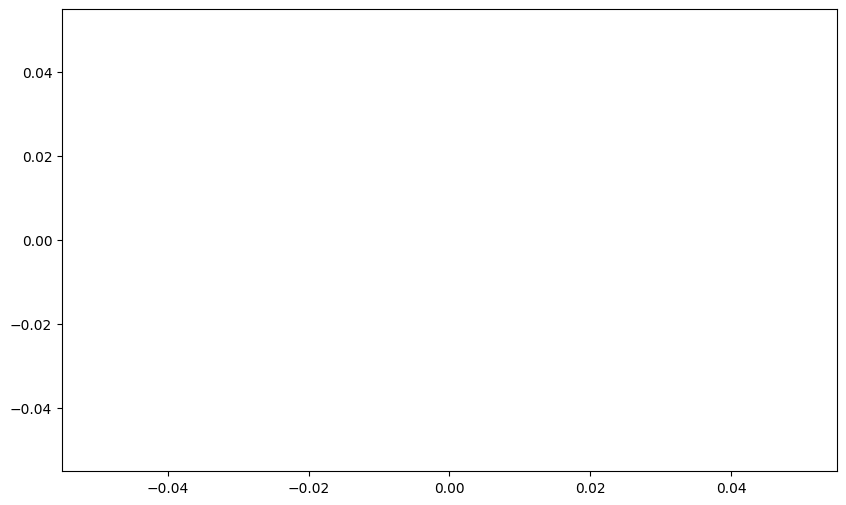

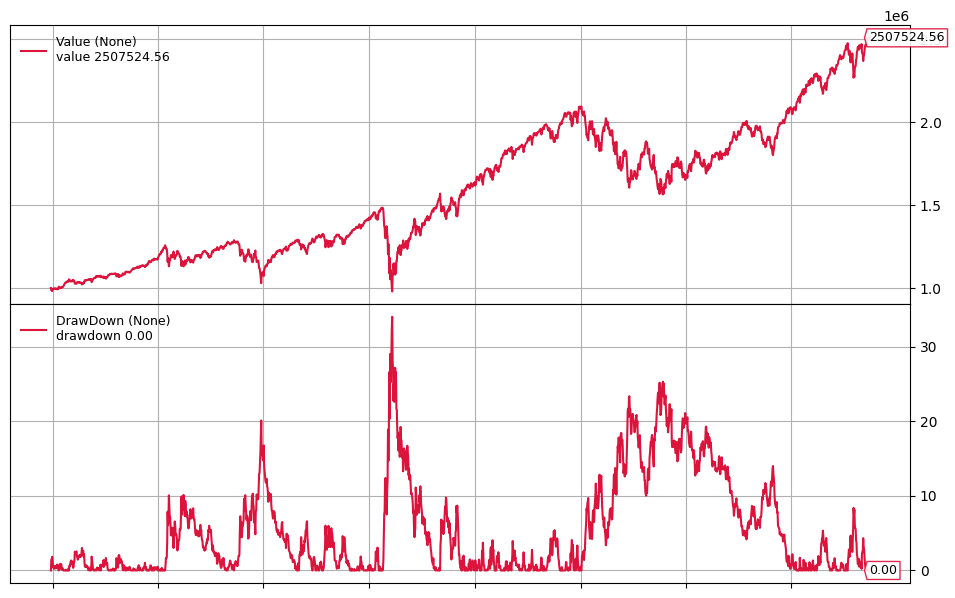

In [15]:
############################################################
# Run the backtest for the bench mark
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.plot() # We need to do this to avoid errors in inline plot

# dd, cagr, sharpe = backtest([benchmark],
benchmark0 = backtest([benchmark],
                            BuyAndHold,
                            start=start_test,
                            end=end_test,
                            plot=True)

In [16]:
def RetreiveStats(bt_result, rm, obj, r_int):
    dd = bt_result.analyzers.drawdown.get_analysis()['max']['drawdown']
    cagr= bt_result.analyzers.returns.get_analysis()['rnorm100']
    sharpe =bt_result.analyzers.sharperatio.get_analysis()['sharperatio']

    return {'Risk_measure':rm, 'Objective':obj, 'R_Interval': r_int, 'Max DrawDown':dd/100.0, 'CAGR': cagr/100.0, 'Sharpe Ratio':sharpe}

In [17]:
metric_list = []

metric_list.append(RetreiveStats(benchmark0, benchmark_symbol, 'N/A', 'N/A'))
display(metric_list)

[{'Risk_measure': 'SPY',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343}]

In [18]:
#
# Retreive Daily Return from bt
#
def RetreiveDailyReturn(bt_result, s_name):
    tret_analyzer = bt_result.analyzers.getbyname('timereturn')
    ret_ = tret_analyzer.get_analysis()
    return pd.DataFrame(ret_.items(), columns=['Date', s_name])


In [19]:
BM_ret = RetreiveDailyReturn(benchmark0, benchmark_symbol)
print(BM_ret)
BM_ret.to_csv(f"{benchmark_symbol}_ret.csv", index=False)

           Date       SPY
0    2013-01-02  0.000000
1    2013-01-03  0.000000
2    2013-01-04  0.000000
3    2013-01-07  0.000000
4    2013-01-08  0.000000
...         ...       ...
2950 2024-09-23  0.002495
2951 2024-09-24  0.002857
2952 2024-09-25 -0.002202
2953 2024-09-26  0.003959
2954 2024-09-27 -0.001448

[2955 rows x 2 columns]


### Rebalancing Monthly, Quarterly, Semiannually using Riskfolio-Lib

In [20]:
############################################################
# Selecting Dates for Rebalancing
############################################################

def SelectIndex(price_in, mode="Q"):
    # Selecting last day of month of available data
    index_Month = price_in.groupby([price_in.index.year, price_in.index.month]).tail(1).index
    # print("Monthly: ", index_Month)
    index_daily = price_in.index
    # print("Daily: ", index_daily)

    # Quarterly Dates
    index_Quater = [x for x in index_Month if float(x.month) % 3.0 == 0 ] 
    # print("Quarterly: ", index_Quater)

    # Semi-Annually Dates
    index_Semi = [x for x in index_Month if float(x.month) % 6.0 == 0 ] 
    # print("Semi-Annually: ", index_Semi)

    match mode:
        case "Q": index=index_Quater
        case "M": index = index_Month
        case "D": index = index_daily
        case "S": index = index_Semi
    # Dates where the strategy will be backtested
    index_ = [index_daily.get_loc(x) for x in index if index_daily.get_loc(x) >= start_test]
    return index_

In [21]:
rebalance_index = {}

In [22]:
rebalance_index["M"] = SelectIndex(returns, mode="M")
rebalance_index["Q"] = SelectIndex(returns, mode="Q")
rebalance_index["S"] = SelectIndex(returns, mode="S")

In [23]:
ret = returns.reset_index()
display(ret.iloc[rebalance_index["M"]])

,Date,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
1006,2016-12-30 00:00:00+00:00,-0.006263,-0.000064,0.001808,-0.007810,-0.010958,-0.003639,-0.007875,-0.001647,-0.006693,...,-0.004496,-0.007302,0.014065,-0.003735,-0.003047,-0.005371,-0.002686,-0.000411,-0.006699,0.005843
1026,2017-01-31 00:00:00+00:00,-0.002169,-0.012985,0.021535,0.009653,0.001062,0.014712,-0.002405,-0.000093,0.014151,...,0.024268,-0.004584,0.000047,-0.001647,0.008130,0.005614,0.063508,-0.001686,-0.007292,-0.001656
1045,2017-02-28 00:00:00+00:00,-0.006424,0.004459,0.009517,0.002652,-0.002931,0.019784,0.006444,-0.000183,-0.015864,...,0.004622,-0.011832,-0.002543,-0.004498,-0.000717,-0.121656,-0.005048,-0.011701,-0.006207,-0.004655
1068,2017-03-31 00:00:00+00:00,-0.013438,-0.006293,-0.007464,-0.017702,0.002133,0.002181,0.002276,-0.002839,0.013031,...,0.008478,-0.006505,-0.002233,0.006466,-0.005029,-0.001086,-0.002014,0.005706,-0.006319,-0.008967
1087,2017-04-28 00:00:00+00:00,0.006622,0.008787,0.004691,0.006826,-0.010103,-0.003841,0.007529,0.003867,0.002664,...,-0.004515,0.004818,-0.016995,-0.004298,-0.007016,-0.004279,-0.008218,-0.008921,-0.016284,-0.015495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,2024-05-31 00:00:00+00:00,0.026909,0.028133,0.028666,0.020870,0.029843,0.025891,0.018357,0.017402,-0.048488,...,0.038599,0.016548,0.020840,0.031308,0.034052,0.041970,0.009276,0.015768,0.020332,0.022007
2890,2024-06-28 00:00:00+00:00,0.012728,-0.002740,-0.002088,0.000482,0.022989,0.005518,0.003776,-0.004503,0.008931,...,-0.006552,-0.009907,0.003839,-0.011086,0.019200,0.008997,0.004030,-0.005559,0.010289,0.031146
2912,2024-07-31 00:00:00+00:00,0.005156,0.020015,-0.002506,-0.030377,0.011272,-0.026657,-0.016166,0.000565,0.016047,...,0.003049,0.016589,-0.027762,0.006880,0.014226,0.016627,-0.002796,0.009124,0.011988,-0.004623
2934,2024-08-30 00:00:00+00:00,-0.028971,0.008592,0.001848,0.004626,0.002788,0.008124,0.009543,0.010267,0.020305,...,0.007313,0.016165,0.005853,0.010408,0.007085,0.001304,0.005542,0.011086,0.012849,0.006703


In [24]:
display(ret.iloc[rebalance_index["Q"]])

,Date,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
1006,2016-12-30 00:00:00+00:00,-0.006263,-0.000064,0.001808,-0.007810,-0.010958,-0.003639,-0.007875,-0.001647,-0.006693,...,-0.004496,-0.007302,0.014065,-0.003735,-0.003047,-0.005371,-0.002686,-0.000411,-0.006699,0.005843
1068,2017-03-31 00:00:00+00:00,-0.013438,-0.006293,-0.007464,-0.017702,0.002133,0.002181,0.002276,-0.002839,0.013031,...,0.008478,-0.006505,-0.002233,0.006466,-0.005029,-0.001086,-0.002014,0.005706,-0.006319,-0.008967
1131,2017-06-30 00:00:00+00:00,0.010116,0.001469,0.006317,-0.001792,0.005373,-0.002913,0.003077,0.013781,-0.005123,...,-0.001181,0.011178,0.004625,-0.002451,0.002924,0.003840,0.003335,0.009863,0.005629,-0.001819
1194,2017-09-29 00:00:00+00:00,0.000000,-0.000236,0.006577,0.011586,0.017451,0.002058,-0.004889,0.015607,-0.000501,...,0.003530,-0.000415,0.005828,-0.005124,0.003330,0.001698,0.014749,0.005599,0.001619,0.005113
1257,2017-12-29 00:00:00+00:00,-0.015162,-0.004859,-0.004006,-0.007933,-0.005957,0.000000,-0.007223,-0.007546,-0.006620,...,0.004304,-0.005039,-0.001147,-0.003033,-0.007657,0.006634,-0.006748,-0.007193,-0.009358,-0.009934
1318,2018-03-29 00:00:00+00:00,0.030254,0.024561,0.018637,0.010868,0.026743,0.016698,-0.002304,0.025350,0.010604,...,0.008010,0.025892,-0.008559,0.013501,0.002531,0.003614,0.002622,0.023785,-0.003750,0.010734
1382,2018-06-29 00:00:00+00:00,0.017632,0.002570,0.000542,0.000723,0.005517,0.005443,-0.005153,0.002725,0.000882,...,0.006125,-0.001289,-0.009042,0.000472,-0.002486,0.006878,0.007442,0.003044,-0.010814,-0.009028
1445,2018-09-28 00:00:00+00:00,0.005060,0.012276,0.006397,0.002098,0.005395,0.008388,-0.006240,-0.005885,0.005462,...,0.005650,-0.012598,0.010727,0.006014,0.004788,0.007999,-0.000982,-0.000420,-0.003732,-0.002982
1508,2018-12-31 00:00:00+00:00,-0.003417,0.019344,0.009354,0.020416,-0.003220,0.008214,-0.013457,0.026776,0.005899,...,-0.005102,0.000876,0.002526,0.018416,0.002811,0.017395,0.006024,0.007448,0.017188,0.007667
1569,2019-03-29 00:00:00+00:00,-0.012255,0.018641,0.020329,-0.002718,-0.010886,0.012199,-0.004439,0.011134,0.022632,...,0.004205,-0.001904,-0.005571,-0.007969,0.011287,-0.000747,0.012653,0.011178,0.000846,0.000881


In [25]:
display(ret.iloc[rebalance_index["S"]])

,Date,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
1006,2016-12-30 00:00:00+00:00,-0.006263,-0.000064,0.001808,-0.007810,-0.010958,-0.003639,-0.007875,-0.001647,-0.006693,...,-0.004496,-0.007302,0.014065,-0.003735,-0.003047,-0.005371,-0.002686,-0.000411,-0.006699,0.005843
1131,2017-06-30 00:00:00+00:00,0.010116,0.001469,0.006317,-0.001792,0.005373,-0.002913,0.003077,0.013781,-0.005123,...,-0.001181,0.011178,0.004625,-0.002451,0.002924,0.003840,0.003335,0.009863,0.005629,-0.001819
1257,2017-12-29 00:00:00+00:00,-0.015162,-0.004859,-0.004006,-0.007933,-0.005957,0.000000,-0.007223,-0.007546,-0.006620,...,0.004304,-0.005039,-0.001147,-0.003033,-0.007657,0.006634,-0.006748,-0.007193,-0.009358,-0.009934
1382,2018-06-29 00:00:00+00:00,0.017632,0.002570,0.000542,0.000723,0.005517,0.005443,-0.005153,0.002725,0.000882,...,0.006125,-0.001289,-0.009042,0.000472,-0.002486,0.006878,0.007442,0.003044,-0.010814,-0.009028
1508,2018-12-31 00:00:00+00:00,-0.003417,0.019344,0.009354,0.020416,-0.003220,0.008214,-0.013457,0.026776,0.005899,...,-0.005102,0.000876,0.002526,0.018416,0.002811,0.017395,0.006024,0.007448,0.017188,0.007667
1632,2019-06-28 00:00:00+00:00,0.011522,-0.000027,0.002816,0.005543,0.006667,0.004209,0.008050,0.005400,0.002411,...,0.006641,0.013722,0.004767,0.012065,0.016070,0.008618,-0.000306,0.022556,-0.002096,0.021778
1760,2019-12-31 00:00:00+00:00,0.003529,-0.001961,0.002277,0.007218,-0.004648,0.013378,0.003452,-0.005168,0.002928,...,0.011628,0.001646,0.008286,0.010657,0.001024,-0.005276,-0.000523,0.002472,0.003104,0.002897
1885,2020-06-30 00:00:00+00:00,0.012753,-0.057535,0.022201,0.017301,0.006975,0.002685,0.007716,0.022380,0.017513,...,0.002203,0.015880,0.004134,0.011392,0.010699,0.011470,0.032896,-0.013785,0.008045,0.028744
2013,2020-12-31 00:00:00+00:00,-0.026081,-0.012046,0.013132,0.009767,0.023238,0.010271,0.006872,0.010896,0.011102,...,0.017295,0.004775,0.008736,-0.002179,0.009477,0.015240,0.008771,-0.002271,0.010492,0.005090
2137,2021-06-30 00:00:00+00:00,0.028531,0.016118,-0.016614,0.008300,0.008489,0.001225,-0.000877,0.010833,0.001659,...,-0.005682,0.012249,-0.009193,0.014555,0.004187,-0.000455,-0.007418,0.017910,0.003403,0.003036


In [26]:
###########################################################
# Building Constraints
############################################################

asset_classes = pd.DataFrame(asset_classes_dict)
asset_classes = asset_classes.sort_values(by=['Assets'])
# print(asset_classes)
print(asset_classes['Industry'].unique())

constraints = {'Disabled': [False, False, True],
               'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

['Energy' 'Financials' 'Health Care' 'Consumer Discretionary' 'Utilities'
 'Consumer Staples' 'Industrials' 'Information Technology' 'Materials'
 'Telecommunications Services']


,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,0.10,,,,
1,False,All Classes,Industry,,<=,0.20,,,,
2,True,All Classes,Industry,,>=,0.03,,,,


In [27]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [28]:
############################################################
# Building View for Black Litterman
############################################################
views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Industry', 'Industry', 'Industry'],
         'Position': ['Energy', 'Consumer Staples', 'Materials'],
         'Sign': ['>=', '>=', '>='],
         'Weight': [0.08, 0.1, 0.09], # Annual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Industry', 'Industry', 'Industry'],
         'Relative': ['Financials', 'Utilities', 'Industrials']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Industry,Energy,>=,0.08,Classes,Industry,Financials
1,False,Classes,Industry,Consumer Staples,>=,0.10,Classes,Industry,Utilities
2,False,Classes,Industry,Materials,>=,0.09,Classes,Industry,Industrials


In [29]:
P, Q = rp.assets_views(views, asset_classes)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2
0,1.0,0.0,0.00
1,-0.2,0.0,0.00
2,0.0,0.0,0.00
3,0.0,0.0,0.00
4,0.0,0.0,0.00
5,0.0,-0.5,0.00
6,0.0,0.5,0.00
7,0.0,0.0,-0.25
8,0.0,0.0,0.00
9,0.0,0.0,0.00


,0
0,0.08
1,0.10
2,0.09


* The optimization is based on the returns of previous 1000 days from last date of each quarter, which is about 4 years

In [31]:
plotFlag = True

# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
rms = ['MV']

# Objective Functions 
objectives = ['Sharpe', 'MinRisk', 'MaxRet']
objectives = ['Sharpe', 'MaxRet']

# rebalance interval: Monthly, Quarterly, Semiannually
reb_interval = ["M","Q","S"]
reb_interval = ["Q","S"]

In [43]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

for obj in objectives:
    models[obj] = {}
    for r in reb_interval:
        models[obj][r] = {}
        for rm in rms:
            print(obj, ",", r, ",", rm)
            weights = pd.DataFrame([])
            for i in rebalance_index[r]:
                Y = returns.iloc[i-test_size:i,:] # taking last 4 years (250 trading days per year)
                # display("from ", Y.index[0], " to ", Y.index[-1])
                # display(Y.head())
                # Building the portfolio object
                port = rp.Portfolio(returns=Y)

                # port.solvers = ['MOSEK']
                port.alpha = 0.05
                model='BL' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
                hist = False # Use historical scenarios for risk measures that depend on scenarios
                rf = 0 # Risk free rate
                l = 0 # Risk aversion factor, only useful when obj is 'Utility'

                # Add portfolio constraints
                # port.ainequality = A
                # port.binequality = B

                # Calculating optimum portfolio
        
                # Select method and estimate input parameters:
        
                method_mu='hist' # Method to estimate expected returns based on historical data.
                method_cov='hist' # Method to estimate covariance matrix based on historical data.
        
                port.assets_stats(method_mu=method_mu, method_cov=method_cov)
                
                # Estimate optimal portfolio:
                w = port.optimization(model='Classic', rm=rm, obj=obj, rf=rf, l=l, hist=True)
        
                # Estimate Black Litterman inputs:
                port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

                if rm == 'MV':
                    hist = False
                else:
                    hist = True
                w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

                if w is None:
                    w = weights.tail(1).T
                # display(w)
                weights = pd.concat([weights, w.T], axis = 0)
            
            models[obj][r][rm] = weights.copy()
            models[obj][r][rm].index = rebalance_index[r]

Sharpe , Q , MV
Sharpe , S , MV
MaxRet , Q , MV
MaxRet , S , MV
CPU times: user 29.6 s, sys: 1min 14s, total: 1min 44s
Wall time: 5.36 s


In [44]:
for obj in objectives:
    for r in reb_interval:
        for rm in rms:
            wght = models[obj][r][rm]
            display(f'obj={obj}, int={r}, rm={rm}')
            display(wght.index)
            display(wght.head(5))

'obj=Sharpe, int=Q, rm=MV'

Index([1006, 1068, 1131, 1194, 1257, 1318, 1382, 1445, 1508, 1569, 1632, 1696,
       1760, 1822, 1885, 1949, 2013, 2074, 2137, 2201, 2265, 2327, 2389, 2453,
       2516, 2578, 2640, 2703, 2766, 2827, 2890, 2953],
      dtype='int64')

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
1006,0.030175,2.911465e-08,5.620193e-08,1.361549e-04,4.233162e-08,1.318071e-08,0.066327,2.062372e-08,2.026136e-02,3.473967e-08,...,0.088428,2.053002e-08,4.772065e-08,0.064109,5.688110e-08,4.012508e-08,5.033533e-08,1.440535e-08,5.418592e-08,1.898212e-08
1068,0.031851,2.109805e-03,6.568097e-08,2.356201e-06,6.040119e-08,1.377695e-08,0.063232,1.639630e-08,1.732035e-02,4.126496e-08,...,0.045674,1.817384e-08,5.888477e-08,0.067438,6.876899e-08,5.854143e-08,7.551242e-08,1.461247e-08,6.738022e-08,2.014382e-08
1131,0.029238,2.026306e-09,6.705004e-09,5.637002e-09,5.343604e-09,1.382381e-09,0.071663,4.209172e-03,4.863536e-09,3.456952e-09,...,0.110255,2.067189e-09,5.981374e-09,0.067652,1.224318e-08,7.166482e-09,5.929864e-09,1.424953e-09,1.508455e-08,2.003356e-09
1194,0.022870,7.405085e-02,4.245854e-02,3.087621e-08,1.315915e-08,1.300446e-09,0.078224,3.464142e-09,6.501504e-03,5.814170e-09,...,0.098376,2.193888e-09,7.832253e-09,0.067544,2.426863e-08,2.800056e-08,2.550630e-08,1.781829e-09,2.419985e-08,2.670424e-09
1257,0.017269,5.448334e-02,3.224256e-02,1.508327e-07,1.003777e-07,2.817053e-08,0.060243,7.196003e-02,1.669294e-07,5.852765e-08,...,0.090647,3.445092e-08,9.576970e-08,0.073446,2.965526e-07,2.531002e-07,1.495485e-07,3.323383e-08,2.653262e-07,3.804812e-08


'obj=Sharpe, int=S, rm=MV'

Index([1006, 1131, 1257, 1382, 1508, 1632, 1760, 1885, 2013, 2137, 2265, 2389,
       2516, 2640, 2766, 2890],
      dtype='int64')

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
1006,0.030175,2.911465e-08,5.620193e-08,1.361549e-04,4.233162e-08,1.318071e-08,0.066327,2.062372e-08,2.026136e-02,3.473967e-08,...,0.088428,2.053002e-08,4.772065e-08,0.064109,5.688110e-08,4.012508e-08,5.033533e-08,1.440535e-08,5.418592e-08,1.898212e-08
1131,0.029238,2.026306e-09,6.705004e-09,5.637002e-09,5.343604e-09,1.382381e-09,0.071663,4.209172e-03,4.863536e-09,3.456952e-09,...,0.110255,2.067189e-09,5.981374e-09,0.067652,1.224318e-08,7.166482e-09,5.929864e-09,1.424953e-09,1.508455e-08,2.003356e-09
1257,0.017269,5.448334e-02,3.224256e-02,1.508327e-07,1.003777e-07,2.817053e-08,0.060243,7.196003e-02,1.669294e-07,5.852765e-08,...,0.090647,3.445092e-08,9.576970e-08,0.073446,2.965526e-07,2.531002e-07,1.495485e-07,3.323383e-08,2.653262e-07,3.804812e-08
1382,0.018931,2.885841e-01,6.998826e-02,2.929797e-08,3.959863e-08,2.955985e-09,0.103740,3.681334e-09,2.894023e-08,1.012260e-08,...,0.087697,4.571836e-09,1.553479e-08,0.098369,2.151684e-08,1.309760e-02,4.002248e-08,4.590285e-09,2.345828e-08,1.371363e-08
1508,0.020884,2.876965e-01,6.679521e-02,2.435612e-08,1.899331e-08,6.897643e-09,0.103503,3.255896e-08,2.009097e-08,1.534539e-08,...,0.117296,8.448817e-09,2.610767e-08,0.108691,2.743783e-08,2.450752e-08,3.941994e-08,8.983161e-09,3.274826e-08,1.094709e-08


'obj=MaxRet, int=Q, rm=MV'

Index([1006, 1068, 1131, 1194, 1257, 1318, 1382, 1445, 1508, 1569, 1632, 1696,
       1760, 1822, 1885, 1949, 2013, 2074, 2137, 2201, 2265, 2327, 2389, 2453,
       2516, 2578, 2640, 2703, 2766, 2827, 2890, 2953],
      dtype='int64')

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
1006,1.823493e-12,1.905682e-12,1.850640e-12,1.823618e-12,1.827777e-12,1.612579e-12,1.827973e-12,1.721512e-12,2.046410e-12,1.800060e-12,...,1.607850e-12,1.904749e-12,1.736413e-12,2.640446e-12,1.708101e-12,1.798049e-12,1.959829e-12,1.956054e-12,1.725280e-12,2.020018e-12
1068,1.993629e-12,2.076045e-12,1.990960e-12,1.945592e-12,1.993494e-12,1.739609e-12,1.983707e-12,1.859223e-12,2.135782e-12,1.950342e-12,...,1.720020e-12,2.071538e-12,1.874817e-12,2.914932e-12,1.852424e-12,1.951317e-12,2.131825e-12,2.151107e-12,1.862934e-12,2.216182e-12
1131,2.264858e-12,2.361648e-12,2.258624e-12,2.192429e-12,2.258843e-12,1.961562e-12,2.233511e-12,2.102037e-12,2.386257e-12,2.200410e-12,...,1.941890e-12,2.355929e-12,2.131023e-12,3.230854e-12,2.091859e-12,2.193429e-12,2.424879e-12,2.448026e-12,2.106837e-12,2.540189e-12
1194,2.299069e-12,2.369552e-12,2.298351e-12,2.215389e-12,2.295643e-12,1.986163e-12,2.296287e-12,2.123076e-12,2.431243e-12,2.253669e-12,...,1.972367e-12,2.367591e-12,2.165859e-12,3.426368e-12,2.120316e-12,2.237949e-12,2.474052e-12,2.444113e-12,2.123346e-12,2.560421e-12
1257,2.588180e-12,2.653382e-12,2.545640e-12,2.450172e-12,2.589473e-12,2.202261e-12,2.586231e-12,2.355824e-12,2.716578e-12,2.499299e-12,...,2.179601e-12,2.626013e-12,2.387227e-12,4.058696e-12,2.383904e-12,2.552983e-12,2.712262e-12,2.760221e-12,2.370538e-12,2.885525e-12


'obj=MaxRet, int=S, rm=MV'

Index([1006, 1131, 1257, 1382, 1508, 1632, 1760, 1885, 2013, 2137, 2265, 2389,
       2516, 2640, 2766, 2890],
      dtype='int64')

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
1006,1.823493e-12,1.905682e-12,1.850640e-12,1.823618e-12,1.827777e-12,1.612579e-12,1.827973e-12,1.721512e-12,2.046410e-12,1.800060e-12,...,1.607850e-12,1.904749e-12,1.736413e-12,2.640446e-12,1.708101e-12,1.798049e-12,1.959829e-12,1.956054e-12,1.725280e-12,2.020018e-12
1131,2.264858e-12,2.361648e-12,2.258624e-12,2.192429e-12,2.258843e-12,1.961562e-12,2.233511e-12,2.102037e-12,2.386257e-12,2.200410e-12,...,1.941890e-12,2.355929e-12,2.131023e-12,3.230854e-12,2.091859e-12,2.193429e-12,2.424879e-12,2.448026e-12,2.106837e-12,2.540189e-12
1257,2.588180e-12,2.653382e-12,2.545640e-12,2.450172e-12,2.589473e-12,2.202261e-12,2.586231e-12,2.355824e-12,2.716578e-12,2.499299e-12,...,2.179601e-12,2.626013e-12,2.387227e-12,4.058696e-12,2.383904e-12,2.552983e-12,2.712262e-12,2.760221e-12,2.370538e-12,2.885525e-12
1382,1.096524e-10,1.000000e+00,7.508028e-11,7.435023e-11,7.630490e-11,6.971118e-11,7.542966e-11,8.418213e-11,9.511179e-11,7.803276e-11,...,6.632416e-11,9.341146e-11,7.021627e-11,1.083027e-10,7.473824e-11,7.493636e-11,8.090996e-11,1.092003e-10,7.405567e-11,9.964623e-11
1508,7.520367e-11,1.000000e+00,4.723386e-11,4.676112e-11,4.712971e-11,4.309620e-11,4.657242e-11,5.392459e-11,6.033562e-11,4.917299e-11,...,4.148728e-11,5.573284e-11,4.359344e-11,6.674105e-11,4.652034e-11,4.689560e-11,5.165243e-11,6.511956e-11,4.501465e-11,5.746619e-11


In [45]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):
        print("AssetAllocation: ", assets)
        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            # print(f"{j},{i}\n", self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
#                 print(f"counter: {self.counter},{i}")
#                 print(" weights size: ", weights.shape)
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

start=1004 - end=2954
AssetAllocation:  ['APA', 'BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'HPQ', 'JCI', 'JPM', 'LUV', 'MMC', 'MO', 'MSFT', 'NI', 'PCAR', 'PSA', 'SEE', 'T', 'TGT', 'TMO', 'TXT', 'VZ', 'ZION']
backtest.plot: 1004-2954


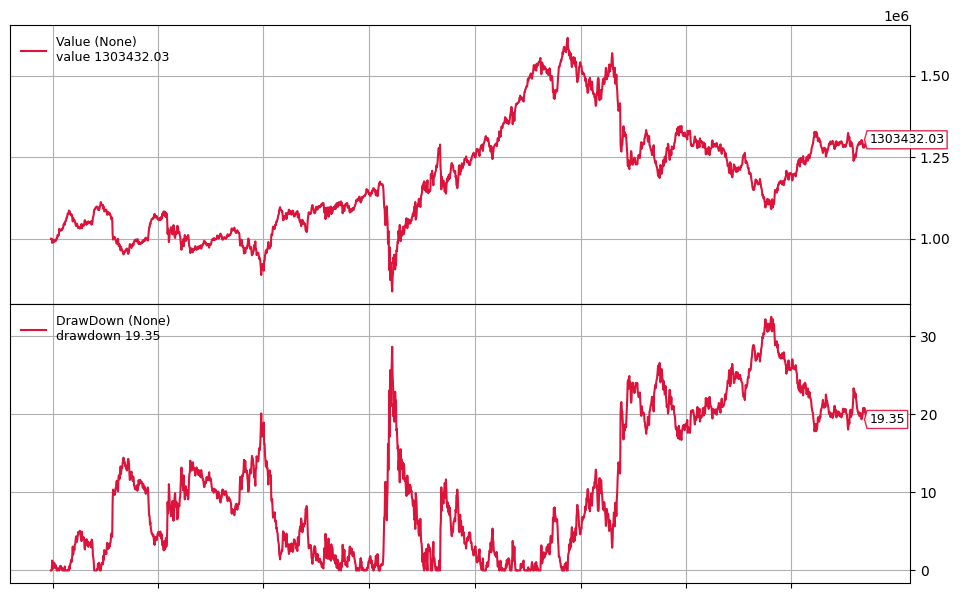

[{'Risk_measure': 'SPY',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Risk_measure': 'MV',
  'Objective': 'Sharpe',
  'R_Interval': 'Q',
  'Max DrawDown': 0.32500061065591035,
  'CAGR': 0.02261365348407057,
  'Sharpe Ratio': 0.24508207226312337}]

           Date    Return
0    2013-01-02  0.000000
1    2013-01-03  0.000000
2    2013-01-04  0.000000
3    2013-01-07  0.000000
4    2013-01-08  0.000000
...         ...       ...
2950 2024-09-23  0.000796
2951 2024-09-24 -0.001271
2952 2024-09-25 -0.003465
2953 2024-09-26  0.002153
2954 2024-09-27 -0.002779

[2955 rows x 2 columns]


,weights
Industry,
Consumer Discretionary,2.482985e-08
Consumer Staples,3.423505e-01
Energy,3.484216e-02
Financials,3.969359e-01
Health Care,6.341053e-08
Industrials,2.086660e-02
Information Technology,1.599737e-01
Materials,4.503110e-02
Telecommunications Services,1.048162e-08


start=1004 - end=2954
AssetAllocation:  ['APA', 'BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'HPQ', 'JCI', 'JPM', 'LUV', 'MMC', 'MO', 'MSFT', 'NI', 'PCAR', 'PSA', 'SEE', 'T', 'TGT', 'TMO', 'TXT', 'VZ', 'ZION']
backtest.plot: 1004-2954


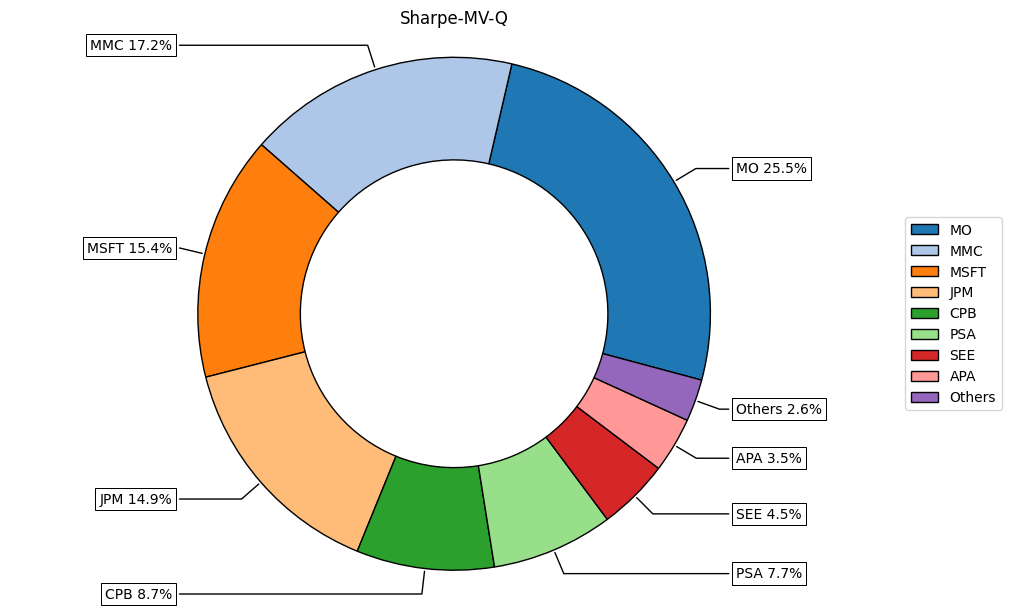

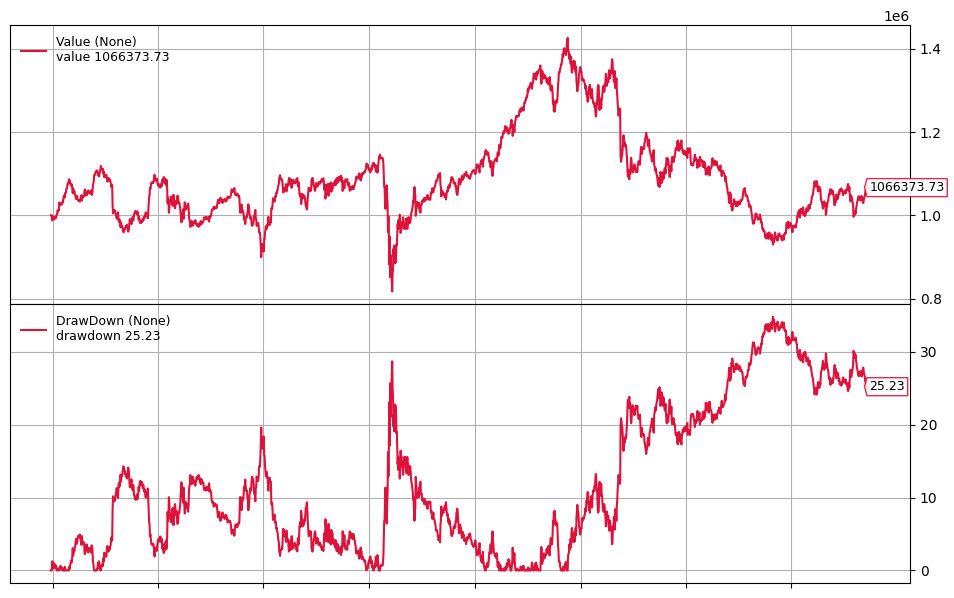

[{'Risk_measure': 'SPY',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Risk_measure': 'MV',
  'Objective': 'Sharpe',
  'R_Interval': 'Q',
  'Max DrawDown': 0.32500061065591035,
  'CAGR': 0.02261365348407057,
  'Sharpe Ratio': 0.24508207226312337},
 {'Risk_measure': 'MV',
  'Objective': 'Sharpe',
  'R_Interval': 'S',
  'Max DrawDown': 0.3481732880527232,
  'CAGR': 0.0053801362236318324,
  'Sharpe Ratio': 0.10235183061044963}]

           Date    Return
0    2013-01-02  0.000000
1    2013-01-03  0.000000
2    2013-01-04  0.000000
3    2013-01-07  0.000000
4    2013-01-08  0.000000
...         ...       ...
2950 2024-09-23 -0.000031
2951 2024-09-24 -0.003263
2952 2024-09-25 -0.001350
2953 2024-09-26  0.002896
2954 2024-09-27 -0.001344

[2955 rows x 2 columns]


,weights
Industry,
Consumer Discretionary,2.836730e-07
Consumer Staples,2.055977e-01
Energy,1.867502e-02
Financials,3.323890e-01
Health Care,4.789508e-07
Industrials,2.068975e-01
Information Technology,1.697314e-01
Materials,6.670859e-02
Telecommunications Services,1.962875e-08


start=1004 - end=2954
AssetAllocation:  ['APA', 'BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'HPQ', 'JCI', 'JPM', 'LUV', 'MMC', 'MO', 'MSFT', 'NI', 'PCAR', 'PSA', 'SEE', 'T', 'TGT', 'TMO', 'TXT', 'VZ', 'ZION']
backtest.plot: 1004-2954


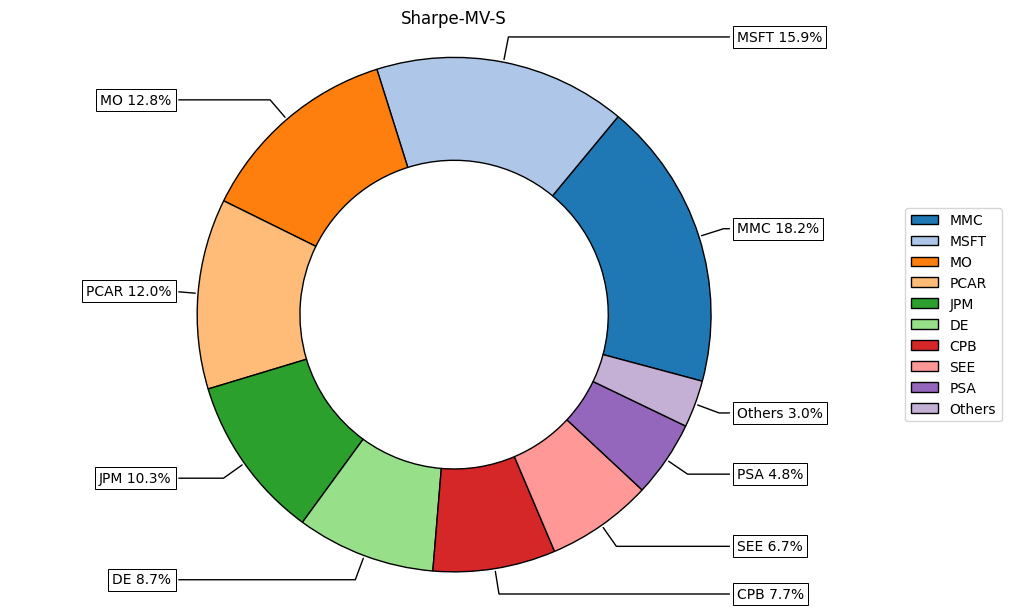

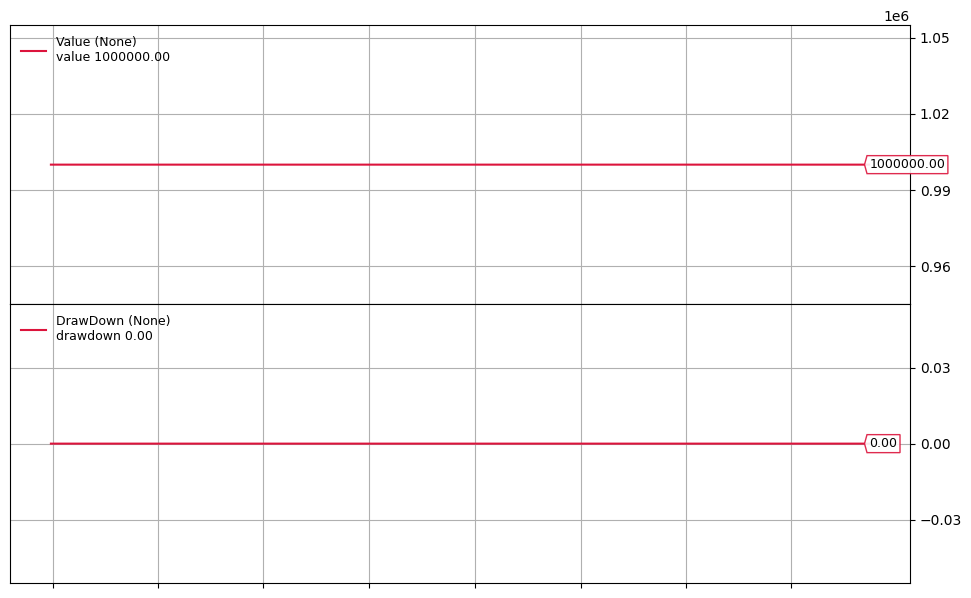

[{'Risk_measure': 'SPY',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Risk_measure': 'MV',
  'Objective': 'Sharpe',
  'R_Interval': 'Q',
  'Max DrawDown': 0.32500061065591035,
  'CAGR': 0.02261365348407057,
  'Sharpe Ratio': 0.24508207226312337},
 {'Risk_measure': 'MV',
  'Objective': 'Sharpe',
  'R_Interval': 'S',
  'Max DrawDown': 0.3481732880527232,
  'CAGR': 0.0053801362236318324,
  'Sharpe Ratio': 0.10235183061044963},
 {'Risk_measure': 'MV',
  'Objective': 'MaxRet',
  'R_Interval': 'Q',
  'Max DrawDown': 0.0,
  'CAGR': 0.0,
  'Sharpe Ratio': None}]

           Date  Return
0    2013-01-02     0.0
1    2013-01-03     0.0
2    2013-01-04     0.0
3    2013-01-07     0.0
4    2013-01-08     0.0
...         ...     ...
2950 2024-09-23     0.0
2951 2024-09-24     0.0
2952 2024-09-25     0.0
2953 2024-09-26     0.0
2954 2024-09-27     0.0

[2955 rows x 2 columns]


,weights
Industry,
Consumer Discretionary,5.445798e-10
Consumer Staples,3.854049e-10
Energy,1.000000e+00
Financials,8.682989e-10
Health Care,5.387776e-10
Industrials,7.353055e-10
Information Technology,3.630310e-10
Materials,1.771638e-10
Telecommunications Services,3.654246e-10


start=1004 - end=2954
AssetAllocation:  ['APA', 'BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'HPQ', 'JCI', 'JPM', 'LUV', 'MMC', 'MO', 'MSFT', 'NI', 'PCAR', 'PSA', 'SEE', 'T', 'TGT', 'TMO', 'TXT', 'VZ', 'ZION']
backtest.plot: 1004-2954


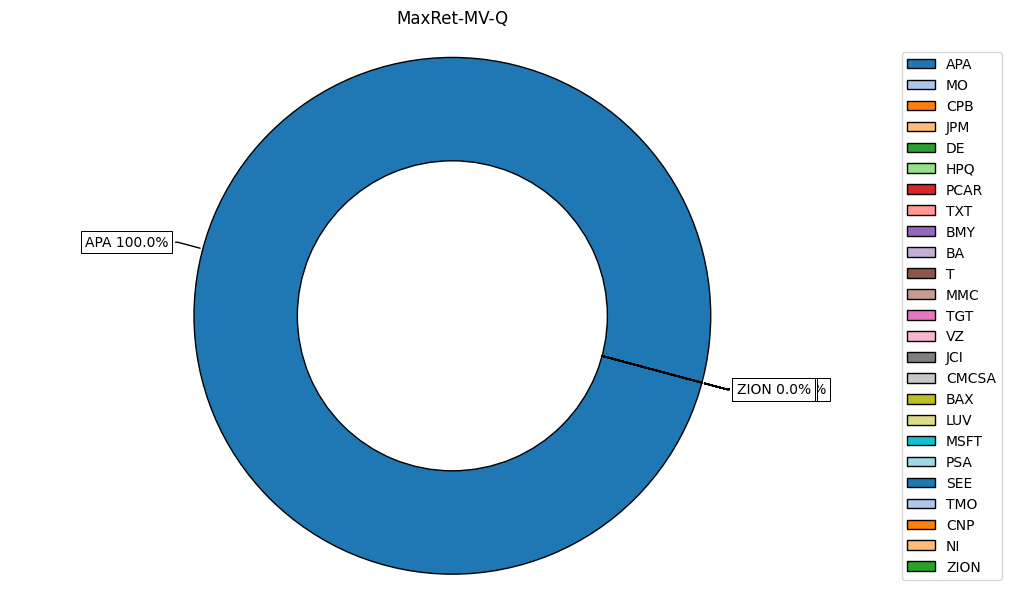

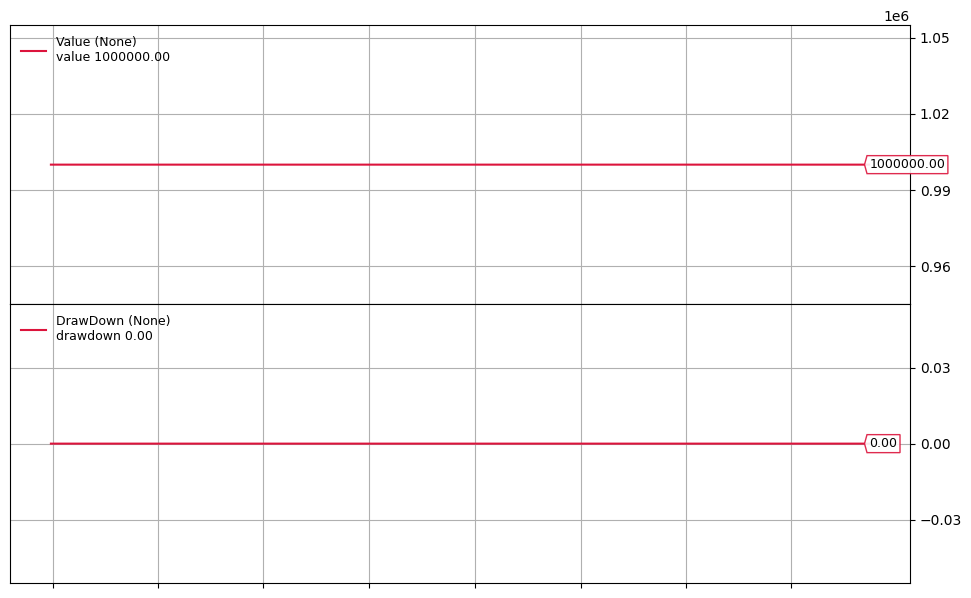

[{'Risk_measure': 'SPY',
  'Objective': 'N/A',
  'R_Interval': 'N/A',
  'Max DrawDown': 0.340194336403793,
  'CAGR': 0.08141809500835094,
  'Sharpe Ratio': 0.6074804940476343},
 {'Risk_measure': 'MV',
  'Objective': 'Sharpe',
  'R_Interval': 'Q',
  'Max DrawDown': 0.32500061065591035,
  'CAGR': 0.02261365348407057,
  'Sharpe Ratio': 0.24508207226312337},
 {'Risk_measure': 'MV',
  'Objective': 'Sharpe',
  'R_Interval': 'S',
  'Max DrawDown': 0.3481732880527232,
  'CAGR': 0.0053801362236318324,
  'Sharpe Ratio': 0.10235183061044963},
 {'Risk_measure': 'MV',
  'Objective': 'MaxRet',
  'R_Interval': 'Q',
  'Max DrawDown': 0.0,
  'CAGR': 0.0,
  'Sharpe Ratio': None},
 {'Risk_measure': 'MV',
  'Objective': 'MaxRet',
  'R_Interval': 'S',
  'Max DrawDown': 0.0,
  'CAGR': 0.0,
  'Sharpe Ratio': None}]

           Date  Return
0    2013-01-02     0.0
1    2013-01-03     0.0
2    2013-01-04     0.0
3    2013-01-07     0.0
4    2013-01-08     0.0
...         ...     ...
2950 2024-09-23     0.0
2951 2024-09-24     0.0
2952 2024-09-25     0.0
2953 2024-09-26     0.0
2954 2024-09-27     0.0

[2955 rows x 2 columns]


,weights
Industry,
Consumer Discretionary,1.040210e-11
Consumer Staples,7.520127e-12
Energy,1.000000e+00
Financials,1.789517e-11
Health Care,1.006864e-11
Industrials,1.411265e-11
Information Technology,7.001970e-12
Materials,3.842751e-12
Telecommunications Services,6.908558e-12


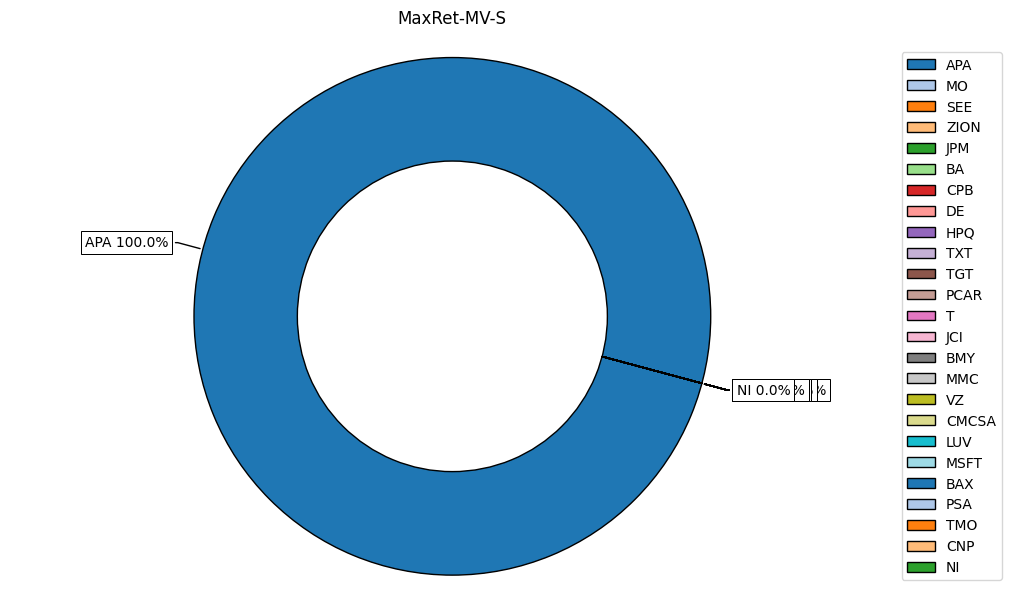

In [46]:
############################################################
# Backtesting All Strategy
############################################################
for obj in objectives:
    for r in reb_interval:
        for rm in rms:
            
            assets = returns.columns.tolist()
            weights = models[obj][r][rm]
        
            result0 = backtest(assets_prices,
                            AssetAllocation,
                            start=start_test,
                            end=end_test,
                            plot=plotFlag)
           
            metric_list.append(RetreiveStats(result0, rm, obj, r))
            display(metric_list)
        
            Dret = RetreiveDailyReturn(result0, 'Return')
            print(Dret)
            Dret.to_csv(f"{obj}_{r}_{rm}_ret.csv", index=False)
            
            ############################################################
            # Plotting the composition of the last MV portfolio
            ############################################################
        
            w = pd.DataFrame(models[obj][r][rm].iloc[-1,:])

            if plotFlag:
                # We need matplotlib >= 3.3.0 to use this function
                ax = rp.plot_pie(w=w, title=f'{obj}-{rm}-{r}', others=0.05, nrow=25, cmap = "tab20",
                                height=6, width=10, ax=None)
        
                # w.plot.pie(subplots=True, figsize=(8, 8))
            
            ############################################################
            # Composition per Industry
            ############################################################
        
            w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
            w_classes = w_classes.groupby(['Industry']).sum()
            w_classes.columns = ['weights']
            display(w_classes)

In [47]:
metric_df = pd.DataFrame(metric_list)
display(metric_df)

,Risk_measure,Objective,R_Interval,Max DrawDown,CAGR,Sharpe Ratio
0,SPY,N/A,N/A,0.340194,0.081418,0.607480
1,MV,Sharpe,Q,0.325001,0.022614,0.245082
2,MV,Sharpe,S,0.348173,0.005380,0.102352
3,MV,MaxRet,Q,0.000000,0.000000,NaN
4,MV,MaxRet,S,0.000000,0.000000,NaN


In [48]:
display(metric_df[metric_df['R_Interval']=='Q'].sort_values(by=['Sharpe Ratio','CAGR'], ascending=False))

,Risk_measure,Objective,R_Interval,Max DrawDown,CAGR,Sharpe Ratio
1,MV,Sharpe,Q,0.325001,0.022614,0.245082
3,MV,MaxRet,Q,0.000000,0.000000,NaN


In [49]:
display(metric_df[metric_df['R_Interval']=='S'].sort_values(by=['Sharpe Ratio','CAGR'], ascending=False))

,Risk_measure,Objective,R_Interval,Max DrawDown,CAGR,Sharpe Ratio
2,MV,Sharpe,S,0.348173,0.00538,0.102352
4,MV,MaxRet,S,0.000000,0.00000,NaN


In [50]:
metric_df.to_csv("Port_Metric.csv", index=False)

In [51]:
for obj in objectives:
    for r in reb_interval:
        for rm in rms:
            models[obj][r][rm].to_csv(f"weights_{obj}_{r}_{rm}.csv")